In [1]:
pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , recall_score, precision_score ,f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer , HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import wordcloud , STOPWORDS
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('tiktok.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5
...,...,...,...,...,...,...,...,...,...,...,...
393,f6998227-f297-4c94-a3b4-c05c79ae3d98,F5X,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo saya sangat kecewa sama tiktok karena sa...,1,133,25.7.3,2022-08-18 08:50:31,NaN,NaN,25.7.3
394,9c4b27b6-941e-4d45-97ff-9232132d6663,ozho jabra,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat penting untuk menghibur da...,5,10,NaN,2020-09-06 13:06:58,NaN,NaN,NaN
395,6f8c4dd1-714c-4210-ba0b-37b70ee02ed8,Sisan Ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,"aplikasi ini sangat bagus dan menghibur, tapi ...",5,5,NaN,2020-07-12 22:41:40,NaN,NaN,NaN
396,adc9f7f6-3586-4fa4-9e4c-01681b9c55f0,Neli Wulansari,https://play-lh.googleusercontent.com/a/ACg8oc...,Banyak ilmu yang didapat dan untuk pengalaman ...,5,81,23.7.3,2022-03-24 20:28:18,NaN,NaN,23.7.3


#### 1. Data Cleaning

In [4]:
df = df[['content', 'score']]
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [5]:
df.shape

(398, 2)

In [6]:
df = df.drop_duplicates(subset='content')

In [7]:
df = df.dropna()

In [8]:
df.shape

(398, 2)

In [9]:
#Re untuk membersihkan data seperti emoji dan segala macam nya

def clean_tiktok_data(text):
  text = re.sub(r'@[A-Za-z0-9_]+', ' ' , text)
  text = re.sub(r'#\w+', ' ' , text)
  text = re.sub(r'RT[\s]+', ' ', text)
  text = re.sub(r'https?://\S+' , ' ' , text)

  text = re.sub(r'[^A-Za-z0-9]', ' ' , text)
  text = re.sub(r's\+' , ' ' , text).strip()

  return text

df['content'] =  df['content'].apply(clean_tiktok_data)

In [10]:
df['content'] = df['content'].str.lower()

In [11]:
df.head(10)

,content,score
0,tiktok sangat bagus bisa berkarya dan mendapa...,5
1,saya suka dengan aplikasi tiktok dan aktif men...,5
2,maaf saya kasih 2 karena aplikasi nya kurang...,2
3,tiktok nya sangat bagus tapi pas di buka video...,3
4,kenapa dengan tiktok saya pas buka muter muter...,2
5,makin di update malah oploadnya selalu gagal m...,1
6,terima kasih tik tok tolong untuk tik tok yan...,5
7,aku suka sama nih tiktok tapi aku serba gagal ...,4
8,pokonya bagus kalau bisa lebih bagus lagi sepe...,4
9,kalau mau bikin video lewat templat kadang bis...,4


#### 2. Preproccesing

In [12]:
score = df['score']
score

0      5
1      5
2      2
3      3
4      2
      ..
393    1
394    5
395    5
396    5
397    4
Name: score, Length: 398, dtype: int64

In [13]:
# Tokenize
#Function untuk membatasi kata2 yang ada di dalam content
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtereted_df = dataframe[mask]
    return filtereted_df

#Minimal 3 kata apabila kurang maka akan dibuang
min_words = 3
#Maximal 50 kata apabila lebih maka akan dibuang 
max_words = 50

df = filter_tokens_by_length(df , 'content', min_words , max_words)

In [14]:
#Normalisasi

norm = {' muter ' : 'putar' , ' gk ' : ' tidak ', ' profisional ' : ' profesional ', ' skrg ' : ' sekarang ', ' uwang ' : ' uang ', ' tiktokan ' : ' tiktok ' , ' yg ' : ' yang ' , ' udh ' : ' udah ' , ' wkwk ' : ' ' , 'min' : ' kak ' , ' malem ' : ' malam ' , ' malem2 ' : ' malam ' , ' muter ' : ' putar ' , ' sm ' : 'sama' , ' dy ' : ' dia ' , ' lg ' : ' lagi ' , ' skrg ' : 'sekarang' , ' pd ' : ' pada ' , ' kismin ' : ' miskin ' , ' bjir ' : ' ' , ' yg ' : ' yang ' , ' utk ' : ' untuk ', ' anjjjj ' : ' ' , }

def normalisasi(str_text):
    for i in norm :
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [15]:
#Stopwords
import Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory , StopWordRemover , ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_arr = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_arr)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [16]:
#Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [tiktok, sangat, bagus, berkarya, mendapat, te...
2      [maaf, kasih, 2, aplikasi, nya, kurang, bagus,...
3      [tiktok, nya, sangat, bagus, pas, buka, video,...
4      [dengan, tiktok, pas, buka, putar, muter, pada...
5      [makin, update, malah, oploadnya, selalu, gaga...
                             ...                        
393    [hallo, sangat, kecewa, sama, tiktok, saya, pu...
394    [aplikasi, sangat, penting, menghibur, menarik...
395    [aplikasi, sangat, bagus, menghibur, sayang, h...
396    [banyak, ilmu, didapat, untuk, pengalaman, dis...
397    [filter, yang, bisa, dipakai, walaupun, di, up...
Name: content, Length: 382, dtype: object

In [17]:
#Steming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = ' '.join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tiktok sangat bagus karya dapat teman banyak bagai daerah jika untung hasil cuan moga tiktok tambah fitur bagai fasilitas sukses and maju tiktok
maaf kasih 2 aplikasi nya kurang bagus padahal jaring full klw udah buka sekali ga di buka lqi
tiktok nya sangat bagus pas buka video nya nonton tidak kapai jadi di baik yakkk tiktok paling the best
dengan tiktok pas buka putar muter padahal wifi penuh gambar nya putar hitam gak gambar nya di baik dong
makin update malah oploadnya selalu gagal mulu slalu hapus terus tambah buruk aja nih aplikasi
terima kasih tik tok untuk tik tok ini masuk dalam peringkat social populer mudah cari mengupdatenya terima kasih
aku suka sama nih tiktok aku serba gagal buat bikin video aku aplod nga like
poko bagus kalau lebih bagus seperti efect kurang lain
kalau mau bikin video lewat templat kadang kadang engga mau simpan video kadang dan kadang engga
aplikasi bagus banget kenapa aku tambah lagu tik tok favorit muncul sana pliss pulih kan
telah baharu wilayah tid

In [18]:
tokenized

0      tiktok sangat bagus karya dapat teman banyak b...
2      maaf kasih 2 aplikasi nya kurang bagus padahal...
3      tiktok nya sangat bagus pas buka video nya non...
4      dengan tiktok pas buka putar muter padahal wif...
5      makin update malah oploadnya selalu gagal mulu...
                             ...                        
393    hallo sangat kecewa sama tiktok saya punya aku...
394      aplikasi sangat penting hibur tarik waktu sedih
395    aplikasi sangat bagus hibur sayang hp sya kent...
396    banyak ilmu dapat untuk alam tiap waktu simpan...
397    filter yang bisa pakai walaupun di update ulan...
Name: content, Length: 382, dtype: object

In [19]:
score

0      5
1      5
2      2
3      3
4      2
      ..
393    1
394    5
395    5
396    5
397    4
Name: score, Length: 398, dtype: int64

In [20]:
#Menggabungkan Kedua df berdasarkan index
score.drop(columns= ['Unnamed : 0'], inplace= True)
df = pd.concat([tokenized , score], axis = 1)

In [21]:
df.head(10)

,content,score
0,tiktok sangat bagus karya dapat teman banyak b...,5
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
3,tiktok nya sangat bagus pas buka video nya non...,3
4,dengan tiktok pas buka putar muter padahal wif...,2
5,makin update malah oploadnya selalu gagal mulu...,1
6,terima kasih tik tok untuk tik tok ini masuk d...,5
7,aku suka sama nih tiktok aku serba gagal buat ...,4
8,poko bagus kalau lebih bagus seperti efect kur...,4
9,kalau mau bikin video lewat templat kadang kad...,4
10,aplikasi bagus banget kenapa aku tambah lagu t...,4


#### 3. Labelling

In [22]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    else:
        return 'positive'
    
df['sentimen'] = df['score'].apply(label_sentiment)

In [23]:
df.head()

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,5,positive
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2,negatif
3,tiktok nya sangat bagus pas buka video nya non...,3,positive
4,dengan tiktok pas buka putar muter padahal wif...,2,negatif
5,makin update malah oploadnya selalu gagal mulu...,1,negatif


In [24]:
df.dtypes

content     object
score        int64
sentimen    object
dtype: object

In [25]:
df.isnull().sum()

content     16
score        0
sentimen     0
dtype: int64

In [26]:
df[df['content'].isnull()]

,content,score,sentimen
1,NaN,5,positive
41,NaN,2,negatif
57,NaN,1,negatif
78,NaN,1,negatif
88,NaN,5,positive
91,NaN,1,negatif
94,NaN,5,positive
95,NaN,1,negatif
132,NaN,1,negatif
135,NaN,1,negatif


In [27]:
df.isnull().sum()

content     16
score        0
sentimen     0
dtype: int64

In [28]:
df_cleaned = df.dropna(subset = ['content'])

In [29]:
df_cleaned

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,5,positive
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2,negatif
3,tiktok nya sangat bagus pas buka video nya non...,3,positive
4,dengan tiktok pas buka putar muter padahal wif...,2,negatif
5,makin update malah oploadnya selalu gagal mulu...,1,negatif
...,...,...,...
393,hallo sangat kecewa sama tiktok saya punya aku...,1,negatif
394,aplikasi sangat penting hibur tarik waktu sedih,5,positive
395,aplikasi sangat bagus hibur sayang hp sya kent...,5,positive
396,banyak ilmu dapat untuk alam tiap waktu simpan...,5,positive


In [30]:
df_cleaned.isnull().sum()

content     0
score       0
sentimen    0
dtype: int64

In [31]:
df_cleaned.loc[5 , 'content']

'makin update malah oploadnya selalu gagal mulu slalu hapus terus tambah buruk aja nih aplikasi'

In [32]:
sentiment_counts = df_cleaned.sentimen.value_counts()
sentiment_counts

sentimen
positive    239
negatif     143
Name: count, dtype: int64

#### 4. Visualization

In [33]:
import seaborn as sns
import matplotlib as plt

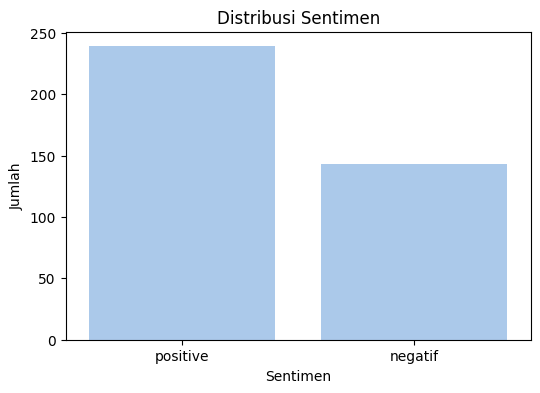

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur palet warna untuk plot
sns.set_palette('pastel')

# Mengatur ukuran figure
plt.figure(figsize=(6,4))

# Membuat countplot menggunakan seaborn
sns.countplot(x='sentimen', data=df_cleaned)

# Menambahkan judul dan label pada sumbu x dan y
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()


In [35]:
data_negative = df_cleaned[df_cleaned['sentimen'] == 'negatif']
data_positive = df_cleaned[df_cleaned['sentimen'] == 'positive']

In [36]:
from wordcloud import wordcloud

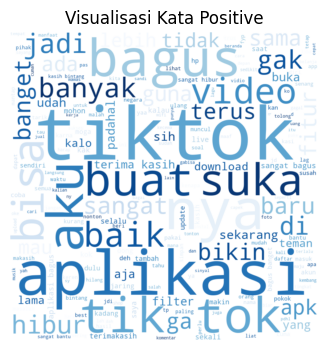

In [37]:
from wordcloud import WordCloud

all_text_s1 = ' '.join(word for word in data_positive['content'].astype(str))
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Positive')
plt.margins(x=0, y=0)
plt.show()


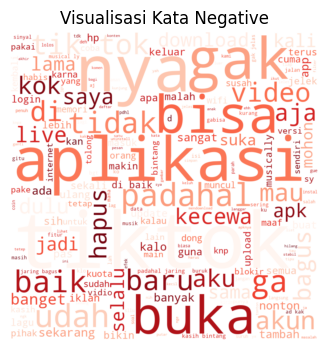

In [38]:
all_text_s1 = ' '.join(word for word in data_negative['content'].astype(str))
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Negative')
plt.margins(x=0, y=0)
plt.show()


#### 5. Spliting Data

In [39]:
X = df_cleaned.content
y = df_cleaned.sentimen

In [40]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

#### 6. Training Data (SVM , Naive Bayes , RandomForest)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [42]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel='linear')
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [43]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer', tvec)
                 ,('classifier', clf1 )])
model2 = Pipeline([('vectorizer', tvec)
                 ,('classifier', clf2 )])
model3 = Pipeline([('vectorizer', tvec)
                 ,('classifier', clf3 )])

In [44]:
print(x_train.isnull().sum())

0


# Algoritma SVC
## ( Accuracy Sebesar 75% )

In [45]:
model1.fit(x_train , y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [46]:
hasil1 = model1.predict(x_test)

In [47]:
matrix = classification_report(y_test , hasil1)
print('classification report : \n', matrix)

classification report : 
               precision    recall  f1-score   support

     negatif       0.59      0.45      0.51        22
    positive       0.80      0.87      0.83        55

    accuracy                           0.75        77
   macro avg       0.69      0.66      0.67        77
weighted avg       0.74      0.75      0.74        77



# Algoritma MultinomialNB 
## ( Akurasi Sebesar 64% Sebelum Di Tunning )

In [48]:
model2.fit(x_train , y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [49]:
hasil2 = model2.predict(x_test)

In [50]:
matrix = classification_report(y_test, hasil2)
print('Classification Report:\n ', matrix)

Classification Report:
                precision    recall  f1-score   support

     negatif       0.33      0.09      0.14        22
    positive       0.72      0.93      0.81        55

    accuracy                           0.69        77
   macro avg       0.53      0.51      0.48        77
weighted avg       0.61      0.69      0.62        77



# Random Fores Classifier
## ( Akurasi Sebesar 78% )

In [51]:
model3.fit(x_train , y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [52]:
hasil3 = model3.predict(x_test)

In [53]:
matrix = classification_report(y_test, hasil3)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

     negatif       0.67      0.36      0.47        22
    positive       0.78      0.93      0.85        55

    accuracy                           0.77        77
   macro avg       0.73      0.65      0.66        77
weighted avg       0.75      0.77      0.74        77



## Multinomial Naive Bayes Sesudah Di Tuning Menggunakan Grid Search

### Bahwa Dapat Dilihat Akurasi nya mengalami peningkatan dari 64% Menjadi 75%

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid2 = {
    'vectorizer__max_df': [0.75, 1.0],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.01, 0.1, 1.0]
}

In [56]:
grid_search2 = GridSearchCV(model2, param_grid2, cv=5, n_jobs=-1, verbose=2)

In [57]:
grid_search2.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.01, 0.1, 1.0],
                         'vectorizer__max_df': [0.75, 1.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [58]:
best_model2 = grid_search2.best_estimator_

In [59]:
hasil2 = best_model2.predict(x_test)

In [60]:
print("Best parameters for MultinomialNB:", grid_search2.best_params_)

Best parameters for MultinomialNB: {'classifier__alpha': 0.01, 'vectorizer__max_df': 0.75, 'vectorizer__ngram_range': (1, 2)}


In [61]:
print('Classification Report for MultinomialNB:\n', classification_report(y_test, hasil2))

Classification Report for MultinomialNB:
               precision    recall  f1-score   support

     negatif       0.57      0.55      0.56        22
    positive       0.82      0.84      0.83        55

    accuracy                           0.75        77
   macro avg       0.70      0.69      0.69        77
weighted avg       0.75      0.75      0.75        77



In [62]:
hasilDecisionTreeClassifier = accuracy_score(hasil1 , y_test)
precision1 =  precision_score(y_test , hasil1 , average= 'weighted')
recall1 = recall_score(y_test , hasil1 , average= 'weighted')
f1_1 = f1_score(y_test , hasil1, average= 'weighted')

hasilMultinominalNB = accuracy_score(hasil2, y_test)
precision2= precision_score(y_test , hasil2 , average = 'weighted')
recall2 = recall_score(y_test , hasil2 , average= 'weighted')
f1_2 = f1_score(y_test , hasil2 , average= 'weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3= precision_score(y_test , hasil3 , average = 'weighted')
recall3 = recall_score(y_test , hasil3 , average= 'weighted')
f1_3 = f1_score(y_test , hasil3 , average= 'weighted')

In [63]:
model = {'Model' : ['Decision Tree Classiffier ',
                    'Multinomial Naive Bayes ' , 
                    'Random Forest Classifier ',
                    ], 

         'Accuracy Score ': [hasilDecisionTreeClassifier , hasilMultinominalNB , hasilRandomForestClassifier],
         'Precision ' : [precision1 , precision2 , precision3],
         ' Recall ' : [recall1, recall2 , recall3],
         'F1- Score ' : [f1_1 , f1_2 , f1_3]

        }

model_df = pd.DataFrame(model)
model_df

,Model,Accuracy Score,Precision,Recall,F1- Score
0,Decision Tree Classiffier,0.753247,0.739496,0.753247,0.742793
1,Multinomial Naive Bayes,0.753247,0.750000,0.753247,0.751489
2,Random Forest Classifier,0.766234,0.750916,0.766234,0.741597


#### 7. Testing

In [64]:
def classify_text (input_text) :
    models= [
        ('DecisionTreeClassifier', model_decisiontree),
        ('MultinomialNB', model_multinomialNB),
        ('RandomForestClassifier' , model_randomforest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results    

In [65]:
#Function untuk model random forest classifier
def classify_RandomForest (inputt_text) :
    modelss = [
        ('RandomForestClas' , model_randomforest)
    ]

    resultss= {}

    for namee, modell in modelss:
        predictions = modell.predict([inputt_text])
        resultss[namee] = predictions[0]

    return resultss

In [66]:
model_decisiontree = model1.fit(x_train , y_train)
model_multinomialNB = model2.fit(x_train , y_train)
model_randomforest = model3.fit(x_train , y_train)

In [67]:
# Input Text Hanya untuk algoritma classifier
inputt_text = input ('Text sentiment klasifikasi random forest : ')

resultss = classify_RandomForest(inputt_text=)

print(' Kata Yang ingin Di Input : ' )

print('\n Hasil Klasifikasi Dari Dari Algoritma Random Forest : ')

for modelss , predictions in resultss.items():
    print(f'{modelss}: {predictions}')

SyntaxError: invalid syntax (65299148.py, line 4)

In [ ]:
input_text = input ('Text yang ingin di klasifikasikan : ')

results = classify_text(input_text)

print('Input Kata : ' , input_text)

print('\n Hasil Klasifikasi : ')
for model , prediction in results.items():
    print(f'{model}: {prediction}')


Input Kata :  bagus banget

 Hasil Klasifikasi : 
DecisionTreeClassifier: positive
MultinomialNB: positive
RandomForestClassifier: positive
